In [147]:
# imports

import TickLoader
import numpy as np
import pandas as pd
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import get_ipython
import matplotlib.mlab as mlab
import itertools 
from __future__ import division

In [148]:
# Data pull

hrs=['03:45:01','10:54:59']
start_datetime = '2018-02-01 '+hrs[0]
end_datetime = '2018-02-25 '+hrs[1]
symbols=['CC  FMK0018!','C   FMK0018!','6BH8']


Raw_data_US=TickLoader.raw_ticks_dataframe(symbols[0], start_datetime, end_datetime,books_type='direct')
Raw_data_UK=TickLoader.raw_ticks_dataframe(symbols[1], start_datetime, end_datetime,books_type='direct')
Raw_data_GBP=TickLoader.raw_ticks_dataframe(symbols[2], start_datetime, end_datetime,books_type='direct')


In [149]:
Raw_data_US.trade_size.fillna(0,inplace=True)
Raw_data_UK.trade_size.fillna(0,inplace=True)

data_US = Raw_data_US.drop(['symbol','instrumentId'], 1)
data_US = data_US.rename(columns={'bid_price': 'US_bid_price','ask_price': 'US_ask_price','bid_size': 'US_bid_size',
                                 'ask_size': 'US_ask_size', 'mid': 'US_mid', 'wtd_mid': 'US_wtd_mid',
                                 'trade_price':'US_trade_price','trade_size':'US_trade_size',
                                 'bid_orders':'US_bid_orders','ask_orders':'US_ask_orders'})

data_UK = Raw_data_UK.drop(['symbol','instrumentId'], 1)
data_UK = data_UK.rename(columns={'bid_price': 'UK_bid_price','ask_price': 'UK_ask_price','bid_size': 'UK_bid_size',
                                 'ask_size': 'UK_ask_size', 'mid': 'UK_mid', 'wtd_mid': 'UK_wtd_mid',
                                 'trade_price':'UK_trade_price','trade_size':'UK_trade_size',
                                 'bid_orders':'UK_bid_orders','ask_orders':'UK_ask_orders'})

data_GBP = Raw_data_GBP.drop(['symbol','instrumentId','trade_price','bid_orders','ask_orders'], 1)
data_GBP = data_GBP.rename(columns={'bid_price': 'GBP_bid_price','ask_price': 'GBP_ask_price','bid_size': 'GBP_bid_size',
                                 'ask_size': 'GBP_ask_size', 'mid': 'GBP_mid', 'wtd_mid': 'GBP_wtd_mid',
                                   'trade_price':'GBP_trade_price','trade_size':'GBP_trade_size',})

dataDF=data_US.join(data_UK,how='outer').join(data_GBP,how='outer')


dataDF[['US_bid_price','US_ask_price','US_bid_size',
    'US_ask_size', 'US_mid','US_wtd_mid',
    'US_bid_orders','US_ask_orders']]=dataDF[['US_bid_price','US_ask_price','US_bid_size',
    'US_ask_size', 'US_mid','US_wtd_mid',
    'US_bid_orders','US_ask_orders']].ffill().bfill()

dataDF[['UK_bid_price','UK_ask_price','UK_bid_size',
    'UK_ask_size', 'UK_mid','UK_wtd_mid',
    'UK_bid_orders','UK_ask_orders']]=dataDF[['UK_bid_price','UK_ask_price','UK_bid_size',
    'UK_ask_size', 'UK_mid','UK_wtd_mid',
    'UK_bid_orders','UK_ask_orders']].ffill().bfill()

dataDF[['GBP_bid_price','GBP_ask_price','GBP_bid_size',
    'GBP_ask_size', 'GBP_mid','UK_wtd_mid']]= dataDF[['GBP_bid_price',
    'GBP_ask_price','GBP_bid_size','GBP_ask_size', 
    'GBP_mid','GBP_wtd_mid']].ffill().bfill()

In [150]:
# Compute arb prices

dataDF['arb_mid']=dataDF.US_mid-dataDF.UK_mid*dataDF.GBP_mid/10000
dataDF['arb_bid']=dataDF.US_bid_price-dataDF.UK_ask_price*dataDF.GBP_mid/10000
dataDF['arb_ask']=dataDF.US_ask_price-dataDF.UK_bid_price*dataDF.GBP_mid/10000



In [151]:
#compute Liquidity taking

dataDF['US_hitting']=0
dataDF['US_hitting'][(dataDF['US_trade_size'] > 0) & (dataDF['US_trade_price'] == dataDF['US_bid_price'])] = dataDF['US_trade_size']
dataDF['US_hitting_cum']=dataDF['US_hitting'].cumsum()

dataDF['US_liftting']=0
dataDF['US_liftting'][(dataDF['US_trade_size'] > 0) & (dataDF['US_trade_price'] == dataDF['US_ask_price'])] = dataDF['US_trade_size']
dataDF['US_liftting_cum']=dataDF['US_liftting'].cumsum()

dataDF['UK_hitting']=0
dataDF['UK_hitting'][(dataDF['UK_trade_size'] > 0) & (dataDF['UK_trade_price'] == dataDF['UK_bid_price'])] = dataDF['UK_trade_size']
dataDF['UK_hitting_cum']=dataDF['UK_hitting'].cumsum()

dataDF['UK_liftting']=0
dataDF['UK_liftting'][(dataDF['UK_trade_size'] > 0) & (dataDF['UK_trade_price'] == dataDF['UK_ask_price'])] = dataDF['UK_trade_size']
dataDF['UK_liftting_cum']=dataDF['UK_liftting'].cumsum()


/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/local/TMG/s

In [152]:
# resampling
dataDF=dataDF.resample('1S').last().ffill()

#cleaning
dataDF = dataDF.between_time('03:45','10:55')
dataDF['weekday']=[x.weekday() for x in dataDF.index]
dataDF=dataDF[dataDF['weekday']!=5]
dataDF=dataDF[dataDF['weekday']!=6]
# US closed
dataDF=dataDF[(dataDF.index < '2018-02-19') | (dataDF.index > '2018-02-20')]


# resampled volumes
dataDF['US_hitting']=dataDF['US_hitting_cum'].diff(1)
dataDF['US_liftting']=dataDF['US_liftting_cum'].diff(1)
dataDF['UK_hitting']=dataDF['UK_hitting_cum'].diff(1)
dataDF['UK_liftting']=dataDF['UK_liftting_cum'].diff(1)

# future arb moves (Y)
dataDF['arb_move']= dataDF['arb_mid'].diff(-5*60)

#future outright moves
dataDF['US_move']= dataDF['US_mid'].diff(-5*60)
dataDF['UK_move']= dataDF['UK_mid'].diff(-5*60)

# explanatory variables (X)
# liquidity taking
dataDF['US_recent_hitting']=dataDF['US_hitting'].rolling('300S').sum()
dataDF['UK_recent_hitting']=dataDF['UK_hitting'].rolling('300S').sum()
dataDF['US_recent_liftting']=dataDF['US_liftting'].rolling('300S').sum()
dataDF['UK_recent_liftting']=dataDF['UK_liftting'].rolling('300S').sum()

# recent cvd
dataDF['US_recent_cvd']=dataDF['US_recent_liftting']-dataDF['US_recent_hitting']
dataDF['UK_recent_cvd']=dataDF['UK_recent_liftting']-dataDF['UK_recent_hitting']

#rsi (relatice strength index)
dataDF['US_delt']=dataDF['US_mid'].diff()
dataDF['US_delt'][(dataDF['US_delt']>5) |(dataDF['US_delt']<-5) ]=0
dataDF['US_delt_up']=dataDF['US_delt'][dataDF['US_delt']>0]
dataDF['US_delt_down']=-dataDF['US_delt'][dataDF['US_delt']<0]
dataDF['US_rs']= dataDF['US_delt_up'].rolling('1200S').mean()/dataDF['US_delt_down'].rolling('1200S').mean()
dataDF['US_rsi']=100-100/(1+dataDF['US_rs'])

dataDF['UK_delt']=dataDF['UK_mid'].diff()
dataDF['UK_delt'][(dataDF['UK_delt']>5) |(dataDF['UK_delt']<-5) ]=0
dataDF['UK_delt_up']=dataDF['UK_delt'][dataDF['UK_delt']>0]
dataDF['UK_delt_down']=-dataDF['UK_delt'][dataDF['UK_delt']<0]
dataDF['UK_rs']= dataDF['UK_delt_up'].rolling('1200S').mean()/dataDF['UK_delt_down'].rolling('1200S').mean()
dataDF['UK_rsi']=100-100/(1+dataDF['UK_rs'])

#so (stochastic oscillator)
dataDF['US_so']=(dataDF['US_mid'].rolling('20H').max()-
                 dataDF['US_mid'])*(-100)/(dataDF['US_mid'].rolling('20H').max()-dataDF['US_mid'].rolling('10H').min())

dataDF['UK_so']=(dataDF['UK_mid'].rolling('20H').max()-
                 dataDF['UK_mid'])*(-100)/(dataDF['UK_mid'].rolling('20H').max()-dataDF['UK_mid'].rolling('10H').min())

#proc (price rate of change)
dataDF['US_proc']=dataDF['US_mid'].diff(2400)/dataDF['US_mid'].shift(2400)
dataDF['UK_proc']=dataDF['UK_mid'].diff(2400)/dataDF['UK_mid'].shift(2400)

#macd (moving average convergence divergence)
dataDF['US_ema_12'] = pd.ewma(dataDF['US_mid'], span=12*60*60)
dataDF['US_ema_26'] = pd.ewma(dataDF['US_mid'], span=26*60*60)
dataDF['US_macd']=dataDF['US_ema_12']-dataDF['US_ema_26']
dataDF['US_macd_sl']= pd.ewma(dataDF['US_macd'], span=9*60*60)
dataDF['US_macd_signal']= np.sign(dataDF['US_macd']-dataDF['US_macd_sl'])
dataDF['US_macd_signal']= dataDF['US_macd_signal'].diff()
dataDF['US_macd_signal']= np.sign(dataDF['US_macd_signal'])

dataDF['UK_ema_12'] = pd.ewma(dataDF['UK_mid'], span=12*60*60)
dataDF['UK_ema_26'] = pd.ewma(dataDF['UK_mid'], span=26*60*60)
dataDF['UK_macd']=dataDF['UK_ema_12']-dataDF['UK_ema_26']
dataDF['UK_macd_sl']= pd.ewma(dataDF['UK_macd'], span=9*60*60)
dataDF['UK_macd_signal']= np.sign(dataDF['UK_macd']-dataDF['UK_macd_sl'])
dataDF['UK_macd_signal']= dataDF['UK_macd_signal'].diff()
dataDF['UK_macd_signal']= np.sign(dataDF['UK_macd_signal'])




dataDF['US_rsi'].fillna(0.0, inplace=True)
dataDF['UK_rsi'].fillna(0.0, inplace=True)
dataDF['US_so'].fillna(-50.0, inplace=True)
dataDF['UK_so'].fillna(-50.0, inplace=True)
dataDF['US_proc'].fillna(0.0, inplace=True)
dataDF['UK_proc'].fillna(0.0, inplace=True)
dataDF['US_macd_signal'].fillna(0.0, inplace=True)
dataDF['UK_macd_signal'].fillna(0.0, inplace=True)
dataDF['arb_move'].fillna(0.0, inplace=True)
dataDF['US_move'].fillna(0.0, inplace=True)
dataDF['UK_move'].fillna(0.0, inplace=True)

'''
t=range(1,len(dataDF['US_recent_hitting'])+1)

plt.plot(t,dataDF['US_mid'])
plt.show()
plt.plot(t,dataDF['US_macd'])
plt.plot(t,dataDF['US_macd_sl'])
plt.plot(t,dataDF['US_macd_signal'])
plt.show()

'''
'''
t=range(1,len(dataDF['US_recent_hitting'])+1)
plt.plot(t,dataDF['arb_mid'])
plt.show()
plt.plot(t,dataDF['US_mid'])
plt.show()
plt.plot(t,dataDF['UK_mid'])
plt.show()
plt.plot(t,dataDF['US_recent_hitting'])
plt.show()
plt.plot(dataDF['arb_move'],dataDF['US_recent_hitting'])
plt.show()
'''

'''
y:

dataDf['arb_move']

X:

dataDf['US_recent_hitting']
dataDf['UK_recent_hitting']
dataDf['US_recent_liftting']
dataDf['UK_recent_hitting']
dataDf['US_recent_cvd']
dataDf['UK_recent_cvd']
dataDf['US_rsi']
dataDf['UK_rsi']
dataDf['US_so']
dataDf['UK_so']
dataDf['US_proc']
dataDf['UK_proc']
dataDf['US_macd_signal']
dataDf['UK_macd_signal']
 
'''

/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:64: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=43200,min_periods=0,adjust=True).mean()
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:65: FutureWarning: pd.ewm_me

"\ny:\n\ndataDf['arb_move']\n\nX:\n\ndataDf['US_recent_hitting']\ndataDf['UK_recent_hitting']\ndataDf['US_recent_liftting']\ndataDf['UK_recent_hitting']\ndataDf['US_recent_cvd']\ndataDf['UK_recent_cvd']\ndataDf['US_rsi']\ndataDf['UK_rsi']\ndataDf['US_so']\ndataDf['UK_so']\ndataDf['US_proc']\ndataDf['UK_proc']\ndataDf['US_macd_signal']\ndataDf['UK_macd_signal']\n \n"

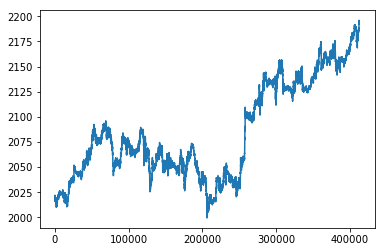

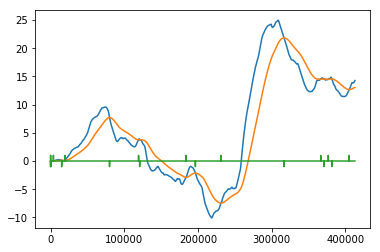

In [153]:
t=range(1,len(dataDF['US_recent_hitting'])+1)

plt.plot(t,dataDF['US_mid'])
plt.show()
plt.plot(t,dataDF['US_macd'])
plt.plot(t,dataDF['US_macd_sl'])
plt.plot(t,dataDF['US_macd_signal'])
plt.show()

In [154]:
# Linear Regression
'''
from sklearn.linear_model import LinearRegression
model=LinearRegression()

y=dataDF['arb_move'].reshape(-1,1)

X=dataDF[['US_rsi','UK_rsi','US_so','UK_so','US_proc','UK_proc','US_macd_signal',]].copy()

dataDF['US_rsi']
dataDF['UK_rsi']
dataDF['US_so']
dataDF['UK_so']
dataDf['US_proc']
dataDf['UK_proc']
dataDf['US_macd_signal']
dataDf['UK_macd_signal']


model.fit(dataDF.UK_mid.reshape(-1,1),dataDF.arb_mid.reshape(-1,1))

print 'UK outright 1400 GBP should give an arb of: %.2f ' %model.predict(1400)[0]

print 'residual sum of squares: %.2f' %np.mean((model.predict(dataDF.UK_mid.reshape(-1,1))-dataDF.arb_mid.reshape(-1,1))**2)

print 'var: %.2f' %np.var(dataDF.arb_mid, ddof=1)

print 'R-squared: %4f' %model.score(dataDF.UK_mid.reshape(-1,1),dataDF.arb_mid.reshape(-1,1))

'''


"\nfrom sklearn.linear_model import LinearRegression\nmodel=LinearRegression()\n\ny=dataDF['arb_move'].reshape(-1,1)\n\nX=dataDF[['US_rsi','UK_rsi','US_so','UK_so','US_proc','UK_proc','US_macd_signal',]].copy()\n\ndataDF['US_rsi']\ndataDF['UK_rsi']\ndataDF['US_so']\ndataDF['UK_so']\ndataDf['US_proc']\ndataDf['UK_proc']\ndataDf['US_macd_signal']\ndataDf['UK_macd_signal']\n\n\nmodel.fit(dataDF.UK_mid.reshape(-1,1),dataDF.arb_mid.reshape(-1,1))\n\nprint 'UK outright 1400 GBP should give an arb of: %.2f ' %model.predict(1400)[0]\n\nprint 'residual sum of squares: %.2f' %np.mean((model.predict(dataDF.UK_mid.reshape(-1,1))-dataDF.arb_mid.reshape(-1,1))**2)\n\nprint 'var: %.2f' %np.var(dataDF.arb_mid, ddof=1)\n\nprint 'R-squared: %4f' %model.score(dataDF.UK_mid.reshape(-1,1),dataDF.arb_mid.reshape(-1,1))\n\n"

In [155]:
# multiple linear regression
import statsmodels.api as sm

X=dataDF[['US_rsi','UK_rsi','US_so','UK_so','US_proc','UK_proc','US_macd_signal','UK_macd_signal']]
Y=dataDF['arb_move']

model=sm.OLS(Y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               arb_move   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     467.7
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        05:38:44   Log-Likelihood:            -7.2009e+05
No. Observations:              412816   AIC:                         1.440e+06
Df Residuals:                  412808   BIC:                         1.440e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
US_rsi            -0.0057      0.000    -14.

In [177]:
# Decision trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

X=dataDF[['US_rsi','UK_rsi','US_so','UK_so','US_proc','UK_proc','US_macd_signal','UK_macd_signal']]
Y=[1 if x>0 else 0 for x in dataDF['arb_move']] 


X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

pipeline = Pipeline([('clf', DecisionTreeClassifier(criterion='entropy'))])

parameters = {
    'clf__max_depth': (5,10,20),
    'clf__min_samples_split': (2,3,4),
    'clf__min_samples_leaf': (1,2,3)
}

grid_search = GridSearchCV(pipeline,parameters,n_jobs=1,verbose=1,scoring='f1')

grid_search.fit(X_train,Y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set: '
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()): 
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid_search.predict(X_test)
print classification_report(Y_test,predictions)

In [265]:
# Decision trees Regression

from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

X=dataDF[['US_rsi','UK_rsi','US_so','UK_so','US_proc','UK_proc','US_macd_signal','UK_macd_signal']]
Y=dataDF['arb_move']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

pipeline = Pipeline([('clf', DecisionTreeRegressor())])

parameters = {
    'clf__max_depth': (2,5),
    'clf__min_samples_split': (2,3,4),
    'clf__min_samples_leaf': (1,2,3)
}

grid_search = GridSearchCV(pipeline,parameters)

grid_search.fit(X_train,Y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set: '
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()): 
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid_search.predict(X_test)

Y_test=Y_test.astype('int')
predictions=predictions.astype('int')

print classification_report(Y_test,predictions)

Best score: 0.040
Best parameters set: 
	clf__max_depth: 5
	clf__min_samples_leaf: 3
	clf__min_samples_split: 3
             precision    recall  f1-score   support

         -6       0.00      0.00      0.00        13
         -5       0.00      0.00      0.00        99
         -4       0.00      0.00      0.00       454
         -3       0.00      0.00      0.00      1566
         -2       0.46      0.01      0.01      4907
         -1       0.26      0.00      0.01     14773
          0       0.59      1.00      0.74     60615
          1       0.30      0.01      0.01     14162
          2       0.37      0.00      0.00      4396
          3       0.64      0.00      0.01      1478
          4       0.21      0.05      0.08       520
          5       0.00      0.00      0.00       150
          6       0.00      0.00      0.00        48
          7       0.00      0.00      0.00        18
          8       0.00      0.00      0.00         5

avg / total       0.47      0.59      

In [137]:
# Decision trees Yoann

from sklearn import tree
import graphviz

X=dataDF[['US_rsi','UK_rsi','US_so','UK_so','US_proc','UK_proc','US_macd_signal','UK_macd_signal']]
dataDF['Y']=[1 if x>2 else -1 if x<-2 else 0 for x in dataDF.arb_move]
Y=dataDF[['Y']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, class_weight="balanced", min_samples_leaf=20)
clf=clf.fit(X_train,Y_train)
prediction_raw=clf.predict(X_test)
#prediction=[1 if x[2]==1 else 0 if x[1]==1 else -1 for x in prediction_raw]


feature_names=['US_rsi','UK_rsi','US_so','UK_so','US_proc','UK_proc','US_macd_signal','UK_macd_signal'] 
class_names=['arb_down','arb_unch','arb_up',]

dot_data=tree.export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)
dot_data=tree.export_graphviz(clf, out_file=None, filled=True,rounded=True, special_characters=True,
                              feature_names=feature_names, class_names=class_names)
graph=graphviz.Source(dot_data)

print classification_report(Y_test, prediction_raw)


             precision    recall  f1-score   support

         -1       0.14      0.75      0.24      7096
          0       0.97      0.40      0.56     89472
          1       0.15      0.66      0.25      6636

avg / total       0.86      0.44      0.52    103204



In [182]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

X=dataDF[['US_rsi','UK_rsi','US_so','UK_so','US_proc','UK_proc','US_macd_signal','UK_macd_signal']]
Y=[1 if x>0 else 0 for x in dataDF['arb_move']] 


X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

pipeline = Pipeline([('clf', RandomForestClassifier(criterion='entropy'))])

parameters = {
    'clf__n_estimators': (2,4),
    'clf__max_depth': (5,10,20),
    'clf__min_samples_split': (2,3,4),
    'clf__min_samples_leaf': (1,2,3)
}

grid_search = GridSearchCV(pipeline,parameters,n_jobs=1,verbose=1,scoring='f1')

grid_search.fit(X_train,Y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set: '
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()): 
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid_search.predict(X_test)
print classification_report(Y_test,predictions)



Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:  2.1min finished


Best score: 0.887
Best parameters set: 
	clf__max_depth: 20
	clf__min_samples_leaf: 1
	clf__min_samples_split: 3
	clf__n_estimators: 4
             precision    recall  f1-score   support

          0       0.90      0.91      0.90     52577
          1       0.90      0.89      0.90     50627

avg / total       0.90      0.90      0.90    103204



In [281]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

X=dataDF[['US_rsi','UK_rsi','US_so','UK_so','US_proc','UK_proc','US_macd_signal','UK_macd_signal']]
Y=dataDF['arb_move'] 


X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

pipeline = Pipeline([('clf', RandomForestRegressor())])

parameters = {
    'clf__n_estimators': (2,4,8),
    'clf__max_depth': (2,4,8),
    'clf__min_samples_split': (2,3),
    'clf__min_samples_leaf': (1,2)
}

grid_search = GridSearchCV(pipeline,parameters,n_jobs=1)

grid_search.fit(X_train,Y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set: '
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()): 
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions=grid_search.predict(X_test)
Y_test=Y_test.astype('int')
predictions=predictions.astype('int')

print classification_report(Y_test,predictions)

    

Best score: 0.167
Best parameters set: 
	clf__max_depth: 8
	clf__min_samples_leaf: 2
	clf__min_samples_split: 2
	clf__n_estimators: 8
             precision    recall  f1-score   support

         -6       0.00      0.00      0.00        22
         -5       0.00      0.00      0.00       115
         -4       0.00      0.00      0.00       482
         -3       0.51      0.02      0.04      1628
         -2       0.44      0.01      0.02      4942
         -1       0.37      0.02      0.04     14679
          0       0.60      0.99      0.75     60594
          1       0.37      0.03      0.06     14155
          2       0.31      0.03      0.05      4354
          3       0.53      0.04      0.07      1523
          4       0.77      0.07      0.13       499
          5       0.79      0.11      0.19       136
          6       0.00      0.00      0.00        51
          7       0.00      0.00      0.00        21
          8       0.00      0.00      0.00         3

avg / total     

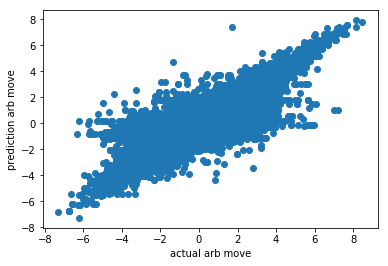

In [136]:
# regression decision tree
X=dataDF[['US_rsi','UK_rsi','US_so','UK_so','US_proc','UK_proc','US_macd_signal','UK_macd_signal']]
Y=dataDF[['arb_move']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

clf=tree.DecisionTreeRegressor(max_depth=20)
clf=clf.fit(X_train,Y_train)
prediction_raw=clf.predict(X_test)
#prediction=[1 if x[2]==1 else 0 if x[1]==1 else -1 for x in prediction_raw]

prediction_raw.max()

plt.scatter(Y_test,prediction_raw)
plt.ylabel('prediction arb move')
plt.xlabel('actual arb move')
plt.show()